In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df = pd.read_csv("../data/student_habits_performance_clean.csv")
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


### Normalizar columnas categorias a mayusculas

In [129]:
df["gender"] = df["gender"].str.strip().str.upper()
df.diet_quality = df["diet_quality"].str.strip().str.upper()
df.parental_education_level = df["parental_education_level"].str.strip().str.upper()
df.internet_quality = df["internet_quality"].str.strip().str.upper()
df.parental_education_level = df["parental_education_level"].str.replace(" ", "_")
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,FEMALE,0.0,1.2,1.1,No,85.0,8.0,FAIR,6,MASTER,AVERAGE,8,Yes,56.2
1,S1001,20,FEMALE,6.9,2.8,2.3,No,97.3,4.6,GOOD,6,HIGH_SCHOOL,AVERAGE,8,No,100.0
2,S1002,21,MALE,1.4,3.1,1.3,No,94.8,8.0,POOR,1,HIGH_SCHOOL,POOR,1,No,34.3
3,S1003,23,FEMALE,1.0,3.9,1.0,No,71.0,9.2,POOR,4,MASTER,GOOD,1,Yes,26.8
4,S1004,19,FEMALE,5.0,4.4,0.5,No,90.9,4.9,FAIR,3,MASTER,GOOD,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,S1995,21,FEMALE,2.6,0.5,1.6,No,77.0,7.5,FAIR,2,HIGH_SCHOOL,GOOD,6,Yes,76.1
954,S1996,17,FEMALE,2.9,1.0,2.4,Yes,86.0,6.8,POOR,1,HIGH_SCHOOL,AVERAGE,6,Yes,65.9
955,S1997,20,MALE,3.0,2.6,1.3,No,61.9,6.5,GOOD,5,BACHELOR,GOOD,9,Yes,64.4
956,S1998,24,MALE,5.4,4.1,1.1,Yes,100.0,7.6,FAIR,0,BACHELOR,AVERAGE,1,No,69.7


### Extracurricular participation a booleano

In [130]:
df.extracurricular_participation = df.extracurricular_participation.map({"Yes": 1, "No": 0})
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,FEMALE,0.0,1.2,1.1,No,85.0,8.0,FAIR,6,MASTER,AVERAGE,8,1,56.2
1,S1001,20,FEMALE,6.9,2.8,2.3,No,97.3,4.6,GOOD,6,HIGH_SCHOOL,AVERAGE,8,0,100.0
2,S1002,21,MALE,1.4,3.1,1.3,No,94.8,8.0,POOR,1,HIGH_SCHOOL,POOR,1,0,34.3
3,S1003,23,FEMALE,1.0,3.9,1.0,No,71.0,9.2,POOR,4,MASTER,GOOD,1,1,26.8
4,S1004,19,FEMALE,5.0,4.4,0.5,No,90.9,4.9,FAIR,3,MASTER,GOOD,1,0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,S1995,21,FEMALE,2.6,0.5,1.6,No,77.0,7.5,FAIR,2,HIGH_SCHOOL,GOOD,6,1,76.1
954,S1996,17,FEMALE,2.9,1.0,2.4,Yes,86.0,6.8,POOR,1,HIGH_SCHOOL,AVERAGE,6,1,65.9
955,S1997,20,MALE,3.0,2.6,1.3,No,61.9,6.5,GOOD,5,BACHELOR,GOOD,9,1,64.4
956,S1998,24,MALE,5.4,4.1,1.1,Yes,100.0,7.6,FAIR,0,BACHELOR,AVERAGE,1,0,69.7


### Part time job a booleano

In [131]:
df.part_time_job = df.part_time_job.map({"Yes": 1, "No": 0})
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,FEMALE,0.0,1.2,1.1,0,85.0,8.0,FAIR,6,MASTER,AVERAGE,8,1,56.2
1,S1001,20,FEMALE,6.9,2.8,2.3,0,97.3,4.6,GOOD,6,HIGH_SCHOOL,AVERAGE,8,0,100.0
2,S1002,21,MALE,1.4,3.1,1.3,0,94.8,8.0,POOR,1,HIGH_SCHOOL,POOR,1,0,34.3
3,S1003,23,FEMALE,1.0,3.9,1.0,0,71.0,9.2,POOR,4,MASTER,GOOD,1,1,26.8
4,S1004,19,FEMALE,5.0,4.4,0.5,0,90.9,4.9,FAIR,3,MASTER,GOOD,1,0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,S1995,21,FEMALE,2.6,0.5,1.6,0,77.0,7.5,FAIR,2,HIGH_SCHOOL,GOOD,6,1,76.1
954,S1996,17,FEMALE,2.9,1.0,2.4,1,86.0,6.8,POOR,1,HIGH_SCHOOL,AVERAGE,6,1,65.9
955,S1997,20,MALE,3.0,2.6,1.3,0,61.9,6.5,GOOD,5,BACHELOR,GOOD,9,1,64.4
956,S1998,24,MALE,5.4,4.1,1.1,1,100.0,7.6,FAIR,0,BACHELOR,AVERAGE,1,0,69.7


Text(0.5, 1.0, 'Age distribution')

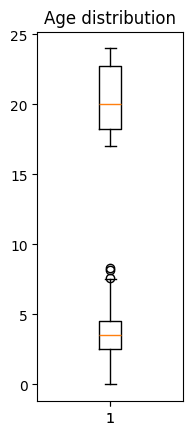

In [132]:
plt.subplot(1, 3, 1)
plt.boxplot(df["age"])
plt.title('Age distribution')
plt.subplot(1, 3, 1)
plt.boxplot(df["study_hours_per_day"])
plt.title('Age distribution')


## Revisón de valores atipicos

In [133]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

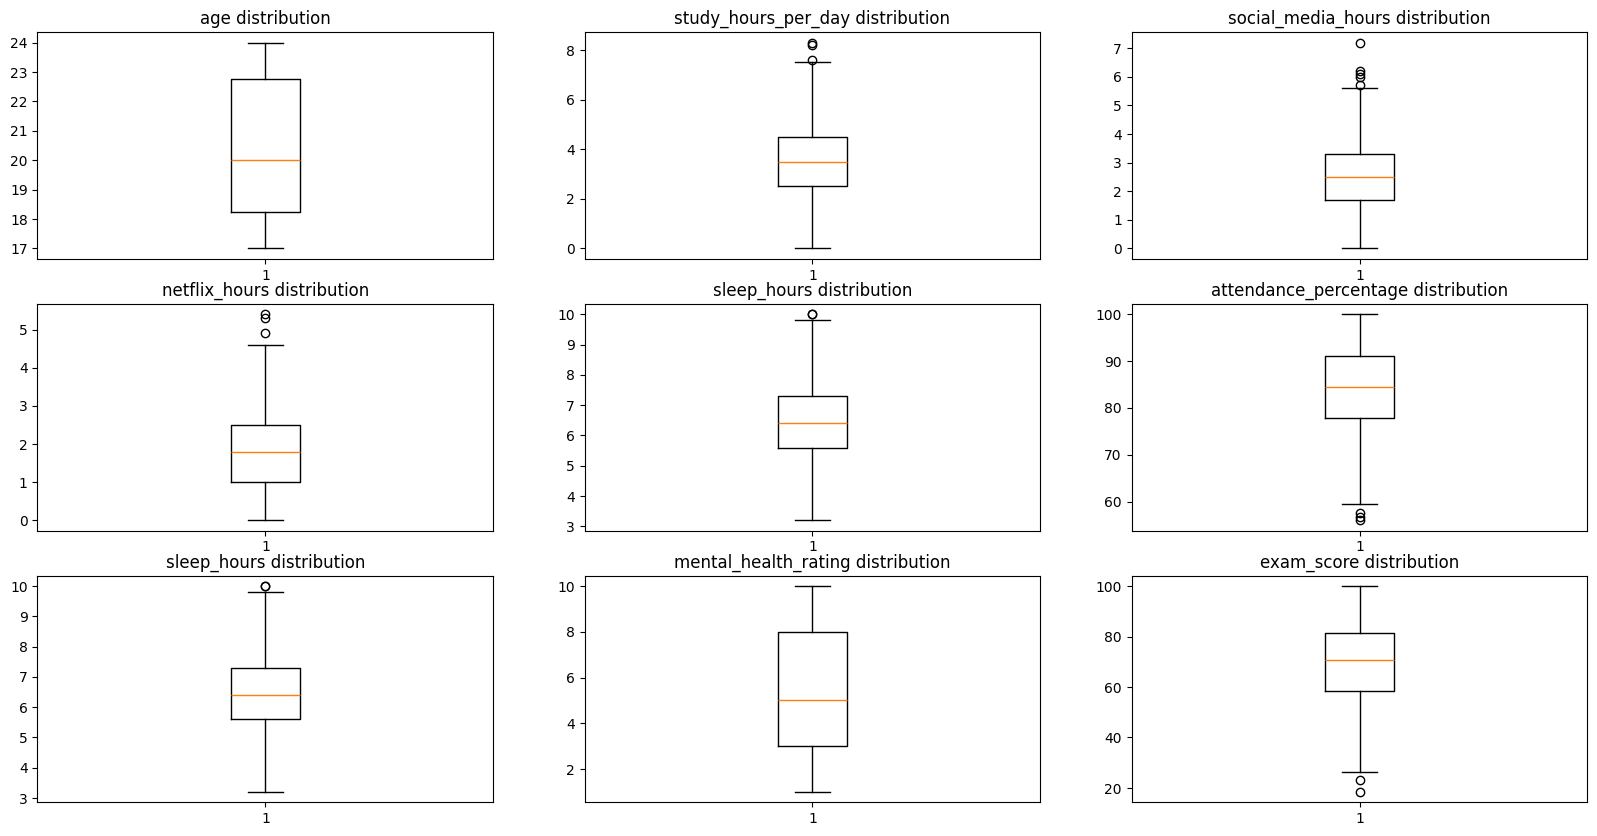

In [134]:
# boxplot para volres atipicos
plt.figure(figsize=(20,10))

# Primera fila
plt.subplot(3, 3, 1)
plt.boxplot(df["age"])
plt.title('age distribution')

plt.subplot(3, 3, 2)
plt.boxplot(df["study_hours_per_day"])
plt.title('study_hours_per_day distribution')

plt.subplot(3, 3, 3)
plt.boxplot(df["social_media_hours"])
plt.title('social_media_hours distribution')

# Segunda fila
plt.subplot(3, 3, 4)
plt.boxplot(df["netflix_hours"])
plt.title('netflix_hours distribution')

plt.subplot(3, 3, 5)
plt.boxplot(df["sleep_hours"])
plt.title('sleep_hours distribution')

plt.subplot(3, 3, 6)
plt.boxplot(df["attendance_percentage"])
plt.title('attendance_percentage distribution')

plt.subplot(3, 3, 7)
plt.boxplot(df["sleep_hours"])
plt.title('sleep_hours distribution')


plt.subplot(3, 3, 8)
plt.boxplot(df["mental_health_rating"])
plt.title('mental_health_rating distribution')

plt.subplot(3, 3, 9)
plt.boxplot(df["exam_score"])
plt.title('exam_score distribution')

plt.show()

### Study hours per day IQR

In [135]:
# deteccion y eliminación de valores atipicos
Q1, Q3 = df['study_hours_per_day'].quantile([0.25, 0.75]) # aqui se calcula el rango intercuartilico del 25% al 75%
IQR = Q3 - Q1 # se calcula el rango intercuartilico
lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR # se calculan los limites inferior
print(lim_inf, lim_sup)

-0.5 7.5


In [136]:
df[(df['study_hours_per_day'] < lim_inf) | (df['study_hours_per_day'] > lim_sup)]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
441,S1455,19,MALE,8.3,3.3,2.6,1,86.6,6.5,FAIR,5,HIGH_SCHOOL,AVERAGE,9,0,100.0
767,S1797,23,MALE,8.2,2.2,1.5,0,83.1,5.7,POOR,2,MASTER,GOOD,5,1,100.0
840,S1875,19,FEMALE,7.6,3.0,2.9,0,99.4,4.8,POOR,0,HIGH_SCHOOL,GOOD,3,0,100.0


In [137]:
# elimino los valores atípicos
df = df[(df['study_hours_per_day'] >= lim_inf) & (df['study_hours_per_day'] <= lim_sup)]


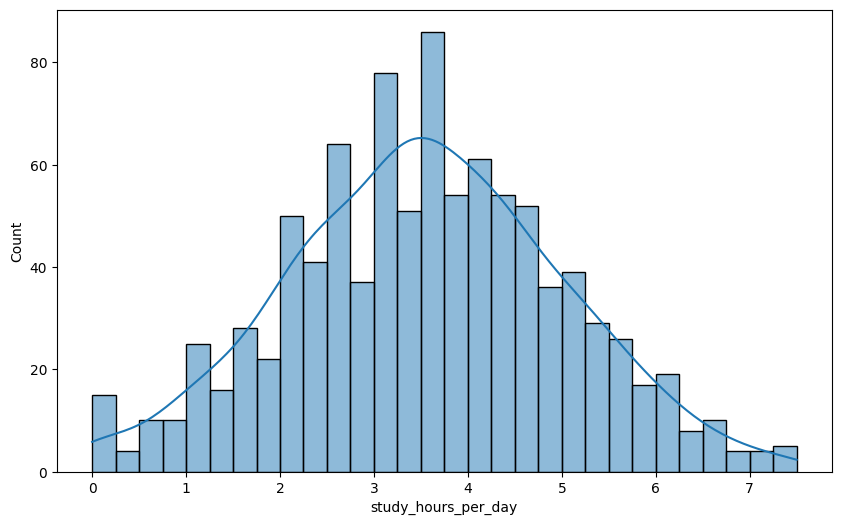

In [138]:
plt.figure(figsize=(10,6))
sns.histplot(df['study_hours_per_day'].dropna(), kde=True, bins=30)
plt.show()

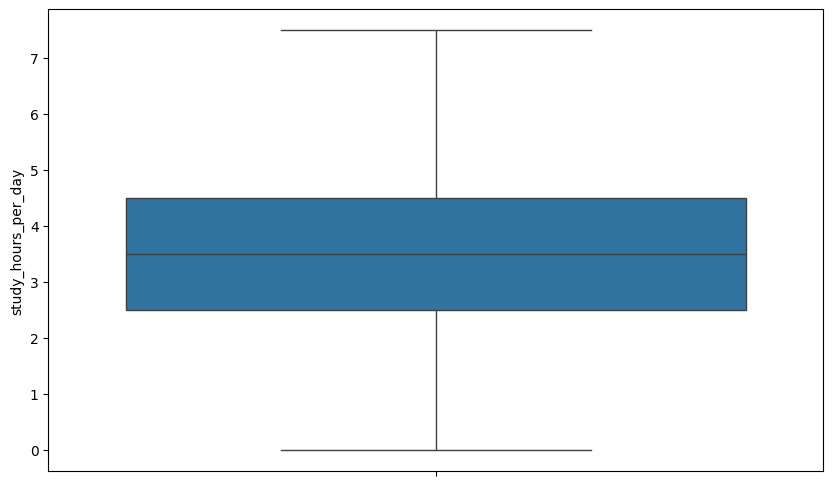

In [139]:
plt.figure(figsize=(10,6))

sns.boxplot(df['study_hours_per_day'])
plt.show()

### Eliminación de valores atipicos para social_media_hours

In [140]:
# Detección y eliminación de valores atípicos
Q1, Q3 = df['social_media_hours'].quantile([0.25, 0.75]) ## aqui se calcula el rango intercuartilico del 25% al 75%
IQR = Q3 - Q1 ## se calcula el rango intercuartilico
lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR ## se calculan los limites inferior
print(lim_inf, lim_sup)

-0.7 5.699999999999999


In [141]:
df[(df['social_media_hours'] < lim_inf) | (df['social_media_hours'] > lim_sup)]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
140,S1145,23,FEMALE,2.2,6.2,3.0,0,86.4,6.9,GOOD,1,HIGH_SCHOOL,GOOD,4,0,46.7
334,S1346,19,MALE,4.5,6.0,2.2,1,95.3,7.6,POOR,3,HIGH_SCHOOL,GOOD,2,1,73.7
348,S1361,17,MALE,4.4,6.1,0.0,0,92.6,5.1,POOR,4,BACHELOR,AVERAGE,9,1,84.9
619,S1641,22,MALE,3.4,5.7,0.0,0,86.9,5.3,GOOD,6,BACHELOR,POOR,6,0,74.7
707,S1735,19,MALE,2.9,7.2,2.9,1,85.5,5.7,FAIR,1,HIGH_SCHOOL,GOOD,6,0,50.1


In [142]:
# eliminamos
df = df[(df['social_media_hours'] >= lim_inf) & (df['social_media_hours'] <= lim_sup)]

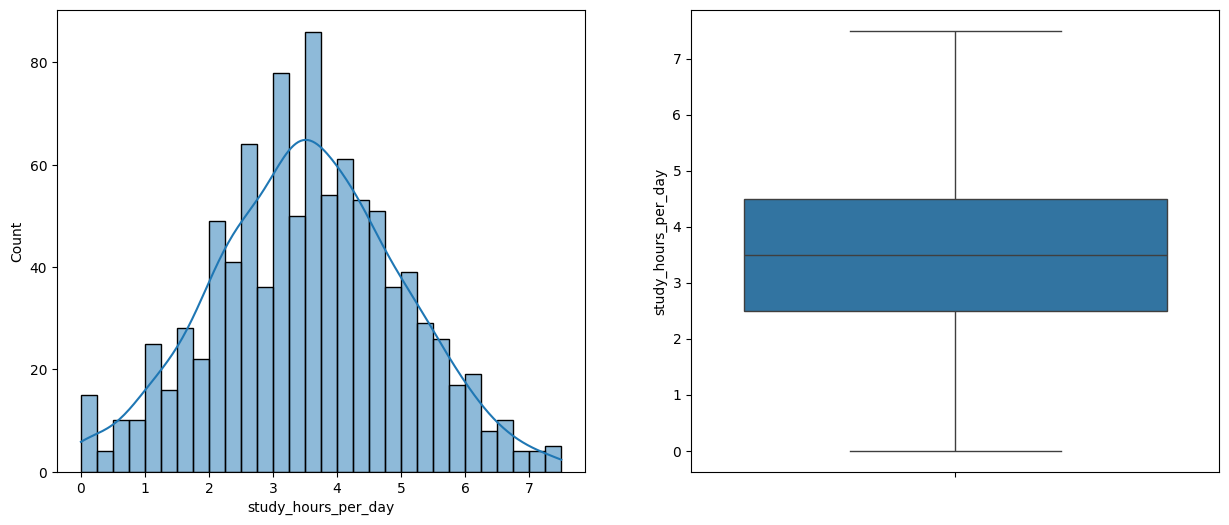

In [143]:
plt.figure(figsize=(15,6))


plt.subplot(1, 2, 1)
sns.histplot(df['study_hours_per_day'].dropna(), kde=True, bins=30)

plt.subplot(1, 2, 2)
sns.boxplot(df['study_hours_per_day'])
plt.show()

### Eliminación de valores atipicos en netflix_hours

In [144]:
# Detección y eliminación de valores atípicos
Q1, Q3 = df['netflix_hours'].quantile([0.25, 0.75]) ## aqui se calcula el rango intercuartilico del 25% al 75%
IQR = Q3 - Q1 ## se calcula el rango intercuartilico
lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR ## se calculan los limites inferior
print(lim_inf, lim_sup)

-1.25 4.75


In [145]:
df[(df['netflix_hours'] < lim_inf) | (df['netflix_hours'] > lim_sup)]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
539,S1556,24,FEMALE,4.0,3.3,5.4,0,81.2,7.6,FAIR,6,BACHELOR,POOR,6,0,79.0
792,S1822,22,FEMALE,2.6,3.4,5.3,0,79.8,9.0,POOR,0,BACHELOR,GOOD,2,0,49.1
851,S1887,22,MALE,3.5,2.1,4.9,0,97.0,7.2,GOOD,5,HIGH_SCHOOL,POOR,9,0,75.9


In [146]:
df = df[(df['netflix_hours'] >= lim_inf) & (df['netflix_hours'] <= lim_sup)]
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,FEMALE,0.0,1.2,1.1,0,85.0,8.0,FAIR,6,MASTER,AVERAGE,8,1,56.2
1,S1001,20,FEMALE,6.9,2.8,2.3,0,97.3,4.6,GOOD,6,HIGH_SCHOOL,AVERAGE,8,0,100.0
2,S1002,21,MALE,1.4,3.1,1.3,0,94.8,8.0,POOR,1,HIGH_SCHOOL,POOR,1,0,34.3
3,S1003,23,FEMALE,1.0,3.9,1.0,0,71.0,9.2,POOR,4,MASTER,GOOD,1,1,26.8
4,S1004,19,FEMALE,5.0,4.4,0.5,0,90.9,4.9,FAIR,3,MASTER,GOOD,1,0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,S1995,21,FEMALE,2.6,0.5,1.6,0,77.0,7.5,FAIR,2,HIGH_SCHOOL,GOOD,6,1,76.1
954,S1996,17,FEMALE,2.9,1.0,2.4,1,86.0,6.8,POOR,1,HIGH_SCHOOL,AVERAGE,6,1,65.9
955,S1997,20,MALE,3.0,2.6,1.3,0,61.9,6.5,GOOD,5,BACHELOR,GOOD,9,1,64.4
956,S1998,24,MALE,5.4,4.1,1.1,1,100.0,7.6,FAIR,0,BACHELOR,AVERAGE,1,0,69.7


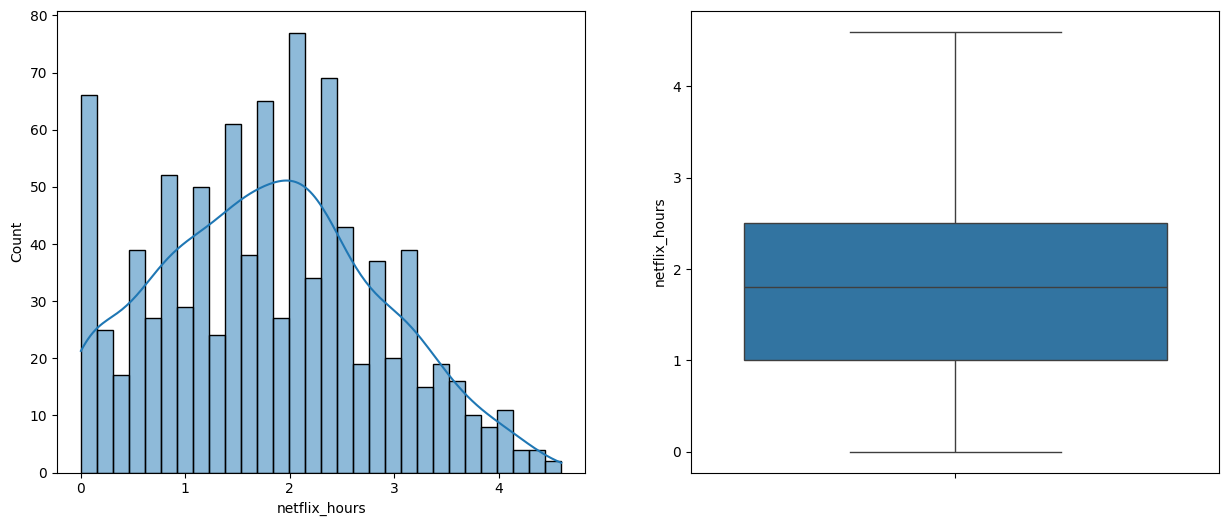

In [147]:
plt.figure(figsize=(15,6))


plt.subplot(1, 2, 1)
sns.histplot(df['netflix_hours'].dropna(), kde=True, bins=30)

plt.subplot(1, 2, 2)
sns.boxplot(df['netflix_hours'])
plt.show()

## sleep_hours

In [148]:
# deteccion y eliminación de valores atipicos
Q1, Q3 = df['sleep_hours'].quantile([0.25, 0.75]) # aqui se calcula el rango intercuartilico del 25% al 75%
IQR = Q3 - Q1 # se calcula el rango intercuartilico
lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR # se calculan los limites inferior
print(lim_inf, lim_sup)

3.0499999999999994 9.85


In [149]:
df[(df['sleep_hours'] < lim_inf) | (df['sleep_hours'] > lim_sup)]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
772,S1802,17,MALE,4.3,1.9,1.9,0,78.7,10.0,FAIR,4,HIGH_SCHOOL,GOOD,2,0,82.9
915,S1955,19,FEMALE,2.7,2.8,1.4,1,92.2,10.0,POOR,3,HIGH_SCHOOL,AVERAGE,8,0,86.9


In [150]:
df = df[(df['sleep_hours'] >= lim_inf) & (df['sleep_hours'] <= lim_sup)]
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,FEMALE,0.0,1.2,1.1,0,85.0,8.0,FAIR,6,MASTER,AVERAGE,8,1,56.2
1,S1001,20,FEMALE,6.9,2.8,2.3,0,97.3,4.6,GOOD,6,HIGH_SCHOOL,AVERAGE,8,0,100.0
2,S1002,21,MALE,1.4,3.1,1.3,0,94.8,8.0,POOR,1,HIGH_SCHOOL,POOR,1,0,34.3
3,S1003,23,FEMALE,1.0,3.9,1.0,0,71.0,9.2,POOR,4,MASTER,GOOD,1,1,26.8
4,S1004,19,FEMALE,5.0,4.4,0.5,0,90.9,4.9,FAIR,3,MASTER,GOOD,1,0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,S1995,21,FEMALE,2.6,0.5,1.6,0,77.0,7.5,FAIR,2,HIGH_SCHOOL,GOOD,6,1,76.1
954,S1996,17,FEMALE,2.9,1.0,2.4,1,86.0,6.8,POOR,1,HIGH_SCHOOL,AVERAGE,6,1,65.9
955,S1997,20,MALE,3.0,2.6,1.3,0,61.9,6.5,GOOD,5,BACHELOR,GOOD,9,1,64.4
956,S1998,24,MALE,5.4,4.1,1.1,1,100.0,7.6,FAIR,0,BACHELOR,AVERAGE,1,0,69.7


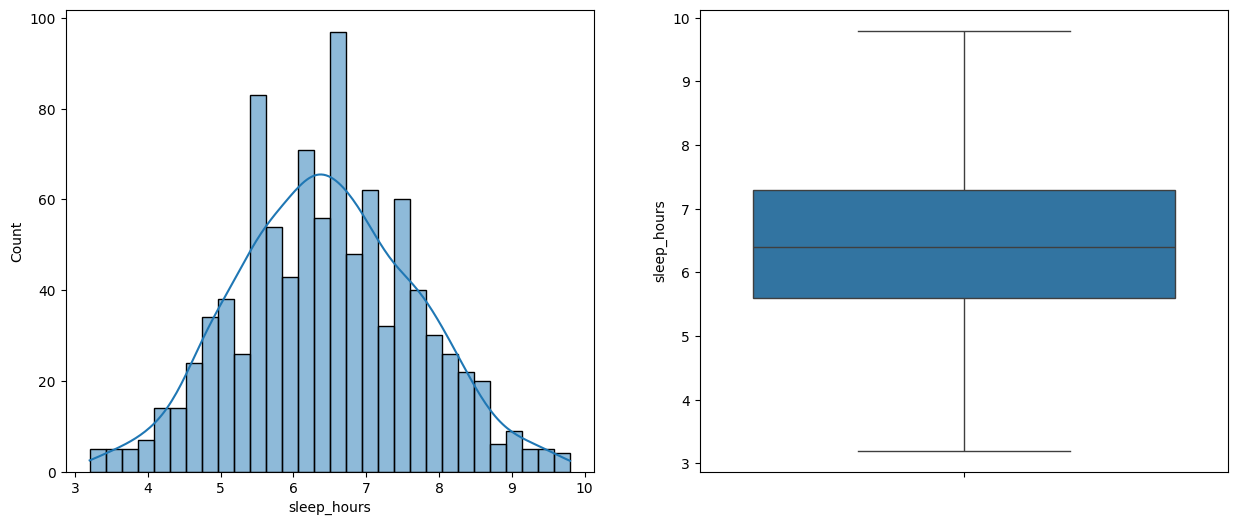

In [151]:
plt.figure(figsize=(15,6))


plt.subplot(1, 2, 1)
sns.histplot(df['sleep_hours'].dropna(), kde=True, bins=30)

plt.subplot(1, 2, 2)
sns.boxplot(df['sleep_hours'])
plt.show()

### attendance percentage_distribution correción de atipicos

In [152]:
# deteccion y eliminación de valores atipicos
Q1, Q3 = df['attendance_percentage'].quantile([0.25, 0.75]) # aqui se calcula el rango intercuartilico del 25% al 75%
IQR = Q3 - Q1 # se calcula el rango intercuartilico
lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR # se calculan los limites inferior
print(lim_inf, lim_sup)

57.85 111.04999999999998


In [153]:
df[(df['attendance_percentage'] < lim_inf) | (df['attendance_percentage'] > lim_sup)]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
629,S1651,24,FEMALE,3.7,1.7,2.3,1,57.6,6.2,GOOD,0,MASTER,AVERAGE,7,0,75.7
680,S1706,20,FEMALE,5.0,1.5,2.2,0,56.7,5.5,POOR,2,MASTER,AVERAGE,4,0,83.6
929,S1971,23,FEMALE,3.5,2.5,1.8,0,56.0,6.1,GOOD,5,HIGH_SCHOOL,AVERAGE,6,0,64.5


In [154]:
df = df[(df['attendance_percentage'] >= lim_inf) & (df['attendance_percentage'] <= lim_sup)]
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,FEMALE,0.0,1.2,1.1,0,85.0,8.0,FAIR,6,MASTER,AVERAGE,8,1,56.2
1,S1001,20,FEMALE,6.9,2.8,2.3,0,97.3,4.6,GOOD,6,HIGH_SCHOOL,AVERAGE,8,0,100.0
2,S1002,21,MALE,1.4,3.1,1.3,0,94.8,8.0,POOR,1,HIGH_SCHOOL,POOR,1,0,34.3
3,S1003,23,FEMALE,1.0,3.9,1.0,0,71.0,9.2,POOR,4,MASTER,GOOD,1,1,26.8
4,S1004,19,FEMALE,5.0,4.4,0.5,0,90.9,4.9,FAIR,3,MASTER,GOOD,1,0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,S1995,21,FEMALE,2.6,0.5,1.6,0,77.0,7.5,FAIR,2,HIGH_SCHOOL,GOOD,6,1,76.1
954,S1996,17,FEMALE,2.9,1.0,2.4,1,86.0,6.8,POOR,1,HIGH_SCHOOL,AVERAGE,6,1,65.9
955,S1997,20,MALE,3.0,2.6,1.3,0,61.9,6.5,GOOD,5,BACHELOR,GOOD,9,1,64.4
956,S1998,24,MALE,5.4,4.1,1.1,1,100.0,7.6,FAIR,0,BACHELOR,AVERAGE,1,0,69.7


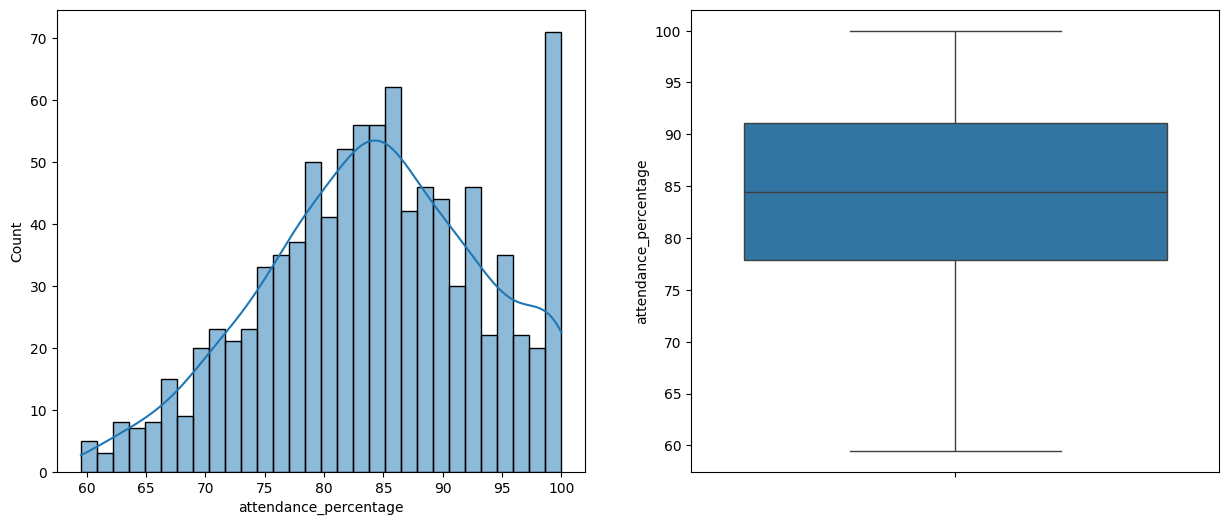

In [155]:
plt.figure(figsize=(15,6))


plt.subplot(1, 2, 1)
sns.histplot(df['attendance_percentage'].dropna(), kde=True, bins=30)

plt.subplot(1, 2, 2)
sns.boxplot(df['attendance_percentage'])
plt.show()

### Corrección átipicos sleep_hours

In [160]:
# deteccion y eliminación de valores atipicos
Q1, Q3 = df['sleep_hours'].quantile([0.25, 0.75]) # aqui se calcula el rango intercuartilico del 25% al 75%
IQR = Q3 - Q1 # se calcula el rango intercuartilico
lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR # se calculan los limites inferior
print(lim_inf, lim_sup)

3.0499999999999994 9.85


In [159]:
df[(df['sleep_hours'] < lim_inf) | (df['sleep_hours'] > lim_sup)]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score


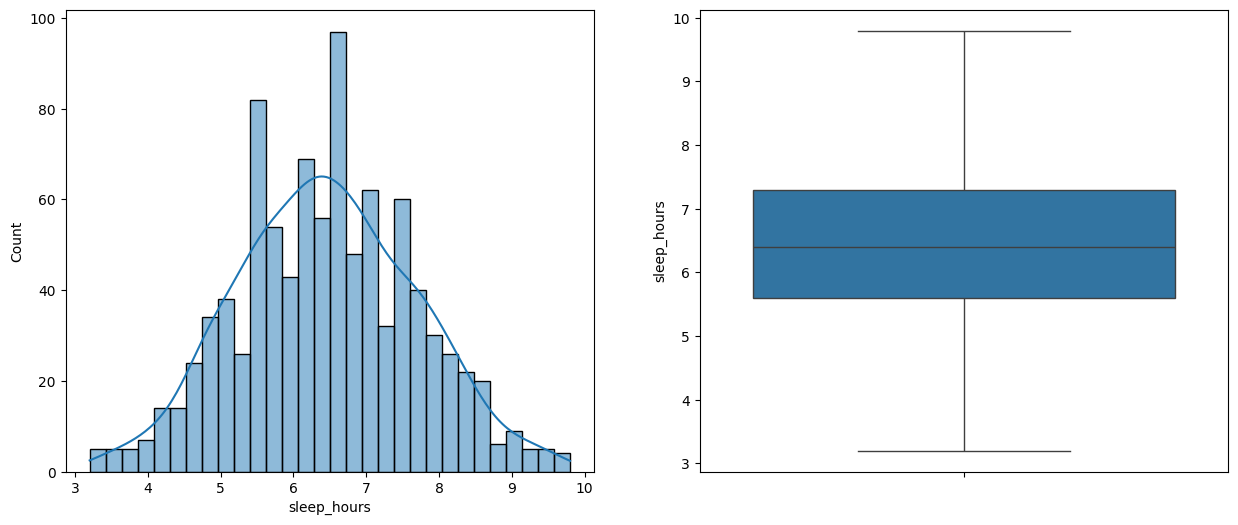

In [161]:
plt.figure(figsize=(15,6))


plt.subplot(1, 2, 1)
sns.histplot(df['sleep_hours'].dropna(), kde=True, bins=30)

plt.subplot(1, 2, 2)
sns.boxplot(df['sleep_hours'])
plt.show()

### Corrección de exam_score

In [162]:
# deteccion y eliminación de valores atipicos
Q1, Q3 = df['exam_score'].quantile([0.25, 0.75]) # aqui se calcula el rango intercuartilico del 25% al 75%
IQR = Q3 - Q1 # se calcula el rango intercuartilico
lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR # se calculan los limites inferior
print(lim_inf, lim_sup)

24.124999999999993 115.525


In [163]:
df[(df['exam_score'] < lim_inf) | (df['exam_score'] > lim_sup)]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
255,S1265,18,FEMALE,0.6,3.1,3.0,0,79.9,5.2,GOOD,1,BACHELOR,GOOD,4,0,18.4
316,S1327,23,MALE,0.9,2.4,2.5,0,89.2,6.9,FAIR,0,HIGH_SCHOOL,POOR,1,0,23.1


In [165]:
df = df[(df['exam_score'] >= lim_inf) & (df['exam_score'] <= lim_sup)]
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,FEMALE,0.0,1.2,1.1,0,85.0,8.0,FAIR,6,MASTER,AVERAGE,8,1,56.2
1,S1001,20,FEMALE,6.9,2.8,2.3,0,97.3,4.6,GOOD,6,HIGH_SCHOOL,AVERAGE,8,0,100.0
2,S1002,21,MALE,1.4,3.1,1.3,0,94.8,8.0,POOR,1,HIGH_SCHOOL,POOR,1,0,34.3
3,S1003,23,FEMALE,1.0,3.9,1.0,0,71.0,9.2,POOR,4,MASTER,GOOD,1,1,26.8
4,S1004,19,FEMALE,5.0,4.4,0.5,0,90.9,4.9,FAIR,3,MASTER,GOOD,1,0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,S1995,21,FEMALE,2.6,0.5,1.6,0,77.0,7.5,FAIR,2,HIGH_SCHOOL,GOOD,6,1,76.1
954,S1996,17,FEMALE,2.9,1.0,2.4,1,86.0,6.8,POOR,1,HIGH_SCHOOL,AVERAGE,6,1,65.9
955,S1997,20,MALE,3.0,2.6,1.3,0,61.9,6.5,GOOD,5,BACHELOR,GOOD,9,1,64.4
956,S1998,24,MALE,5.4,4.1,1.1,1,100.0,7.6,FAIR,0,BACHELOR,AVERAGE,1,0,69.7


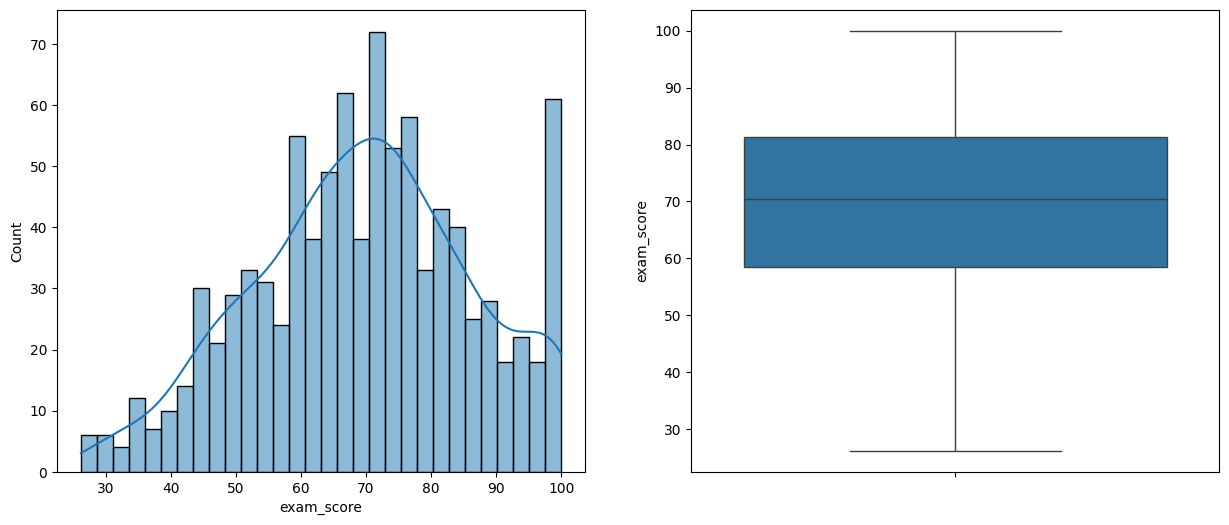

In [166]:
plt.figure(figsize=(15,6))


plt.subplot(1, 2, 1)
sns.histplot(df['exam_score'].dropna(), kde=True, bins=30)

plt.subplot(1, 2, 2)
sns.boxplot(df['exam_score'])
plt.show()

### Verificación de edad

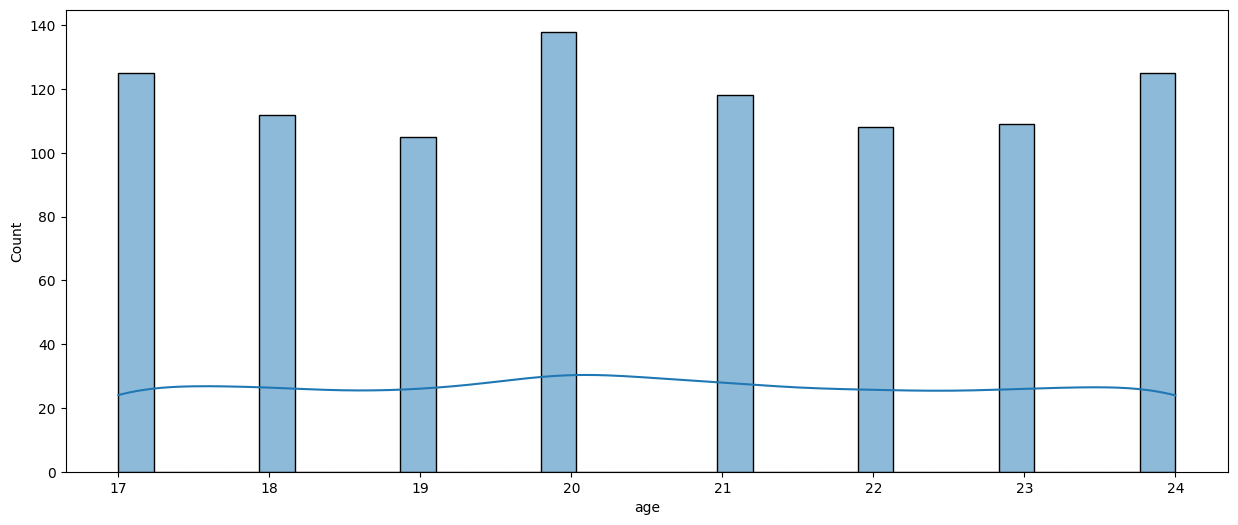

In [168]:
plt.figure(figsize=(15,6))
sns.histplot(df['age'].dropna(), kde=True, bins=30)
plt.show()

In [169]:
df.to_csv('../data/student_habits_performance_clean_atipicos.csv', index=False)